## 树形结构的可视化

[@Yushneng](https://github.com/rainyear)

![PyHub](https://segmentfault.com/image?src=http://upload-images.jianshu.io/upload_images/21342-86881f56ca5e36e2.jpg?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240&objectId=1190000004905072&token=1eade17c84ca343910d56e942a81572f)

In [7]:
from graphviz import Digraph as Graph

class Tree(object):
    def __init__(self, data=None, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right
        
        # _nid as node id 
        self._nid = str(id(self))
    def pre_order_recursive(self, root, visit=print):
        if root:
            visit(root)
        if root.left:
            self.pre_order_recursive(root.left, visit)
        if root.right:
            self.pre_order_recursive(root.right, visit)
            
    def draw(self):
        """绘制树
        """
        graph = Graph(comment="Tree",
                      name="Tree",
                      graph_attr=dict(size='8,4'),
                      node_attr=dict(shape='circle'),
                      edge_attr=dict(arrowsize='0.5'))
        def mk_node(node):
            graph.node(node._nid, str(node.data))
            
        # 通过递归前序遍历创建树的所有节点
        self.pre_order_recursive(self, mk_node)
        
        # 绘制边
        def draw_edges(parent):
            if parent.left:
                graph.edge(parent._nid, parent.left._nid)
                draw_edges(parent.left)
            if parent.right:
                graph.edge(parent._nid, parent.right._nid)
                draw_edges(parent.right)
        draw_edges(self)
        return graph
  

In [8]:
  
def build_tree(lst, leaf="@"):
    """从列表生成树，按照前序遍历的顺序，其中以 leaf 标记为叶子
    """
    if len(lst) == 0:
        return None
    data = lst.pop(0)
    if data == leaf:
        return None
    root = Tree(data = data)
    root.left = build_tree(lst)
    root.right = build_tree(lst)
    return root   

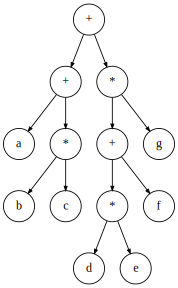

In [9]:
tree = build_tree([
        '+',
            '+',
                'a', '@', '@',
                '*',
                    'b', '@', '@',
                    'c', '@', '@',
            '*',
                '+',
                    '*',
                        'd','@','@',
                        'e','@','@',
                    'f', '@', '@',
                'g'])
graph = tree.draw()
attrs = dict(style='dashed',
            label='1',
            color='red',
            arrowhead='none',
            arrowsize='0.5',
            fontcolor='darkgreen',
            fontsize='10')
graph